# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(x_train))
print("The MNIST database has a test     set of %d examples." % len(x_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test     set of 10000 examples.


### 2. Visualize the First 24 Training Images

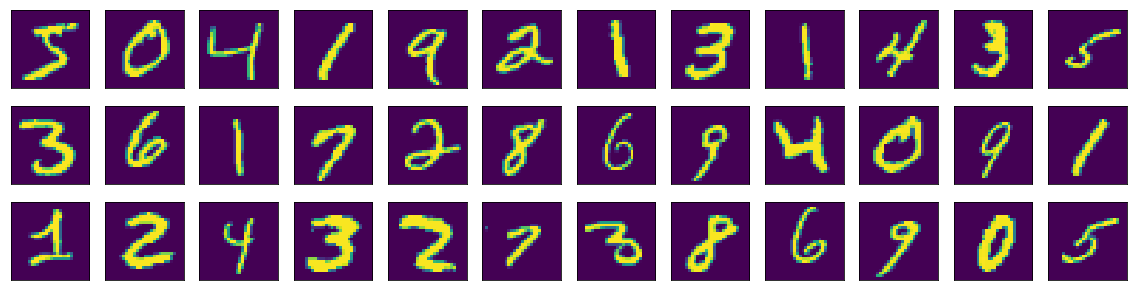

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
y_train[0]

5

In [5]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

x_train = np.reshape(x_train, (55000, 28, 28, 1))
x_test  = np.reshape(x_test,  (10000, 28, 28, 1))
x_valid = np.reshape(x_valid, (5000, 28, 28, 1))

print("x_train shape: %s" % str(x_train.shape))
print("y_train shape: %s" % str(y_train.shape))
print("x_test  shape: %s" % str( x_test.shape))
print("y_test  shape: %s" % str( y_test.shape))
print("x_valid shape: %s" % str(x_valid.shape))
print("y_valid shape: %s" % str(y_valid.shape))

x_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)
x_test  shape: (10000, 28, 28, 1)
y_test  shape: (10000, 10)
x_valid shape: (5000, 28, 28, 1)
y_valid shape: (5000, 10)


### 5. Define the Model Architecture 

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.3))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dropout(.4))
model.add(Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
__________

### 6. Compile the Model 

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### 7. Train the Model 

In [11]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="model_mnist.weights.best.hdf5", verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train,
                batch_size=32, epochs=100,
                validation_data=(x_valid, y_valid),
                callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.07526, saving model to model_mnist.weights.best.hdf5
20s - loss: 0.2326 - acc: 0.9257 - val_loss: 0.0753 - val_acc: 0.9748
Epoch 2/100
Epoch 00001: val_loss improved from 0.07526 to 0.04850, saving model to model_mnist.weights.best.hdf5
20s - loss: 0.0928 - acc: 0.9710 - val_loss: 0.0485 - val_acc: 0.9848
Epoch 3/100
Epoch 00002: val_loss did not improve
21s - loss: 0.0769 - acc: 0.9764 - val_loss: 0.0523 - val_acc: 0.9840
Epoch 4/100
Epoch 00003: val_loss improved from 0.04850 to 0.04569, saving model to model_mnist.weights.best.hdf5
22s - loss: 0.0705 - acc: 0.9784 - val_loss: 0.0457 - val_acc: 0.9858
Epoch 5/100
Epoch 00004: val_loss did not improve
20s - loss: 0.0645 - acc: 0.9807 - val_loss: 0.0527 - val_acc: 0.9866
Epoch 6/100
Epoch 00005: val_loss improved from 0.04569 to 0.04459, saving model to model_mnist.weights.best.hdf5
24s - loss: 0.0625 - acc: 0.9822 - val_loss: 0.04

Epoch 00065: val_loss did not improve
22s - loss: 0.2234 - acc: 0.9539 - val_loss: 0.1321 - val_acc: 0.9782
Epoch 67/100
Epoch 00066: val_loss did not improve
23s - loss: 0.2061 - acc: 0.9566 - val_loss: 0.0792 - val_acc: 0.9812
Epoch 68/100
Epoch 00067: val_loss did not improve
22s - loss: 0.2162 - acc: 0.9536 - val_loss: 0.1248 - val_acc: 0.9840
Epoch 69/100
Epoch 00068: val_loss did not improve
21s - loss: 0.2187 - acc: 0.9544 - val_loss: 0.0913 - val_acc: 0.9826
Epoch 70/100
Epoch 00069: val_loss did not improve
24s - loss: 0.2222 - acc: 0.9529 - val_loss: 0.1298 - val_acc: 0.9818
Epoch 71/100
Epoch 00070: val_loss did not improve
23s - loss: 0.2246 - acc: 0.9545 - val_loss: 0.1218 - val_acc: 0.9840
Epoch 72/100
Epoch 00071: val_loss did not improve
22s - loss: 0.2220 - acc: 0.9517 - val_loss: 0.0890 - val_acc: 0.9768
Epoch 73/100
Epoch 00072: val_loss did not improve
19s - loss: 0.2291 - acc: 0.9511 - val_loss: 0.1143 - val_acc: 0.9732
Epoch 74/100
Epoch 00073: val_loss did not im

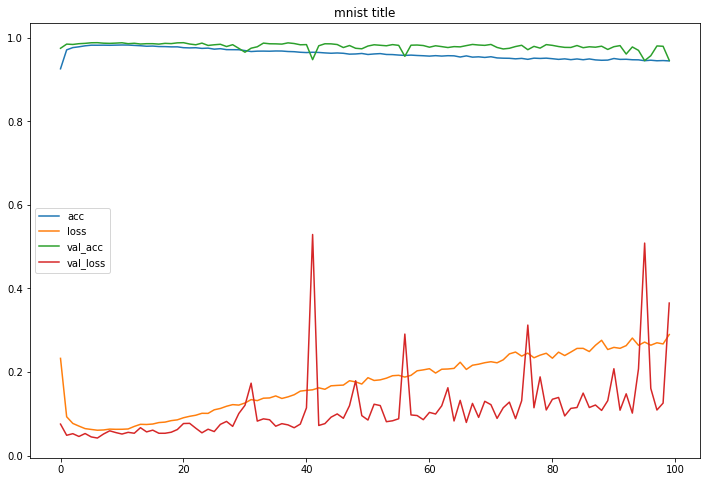

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(hist.history["acc"], label="acc")
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_acc"], label="val_acc")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.title("mnist title")
plt.show()

### 8. Load the Model with the Best Validation Accuracy

In [21]:
model.load_weights("model_mnist.weights.best.hdf5")

### 9. Calculate Classification Accuracy on Test Set

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9882


### MLP accuracy: 97.9000%

### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [23]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

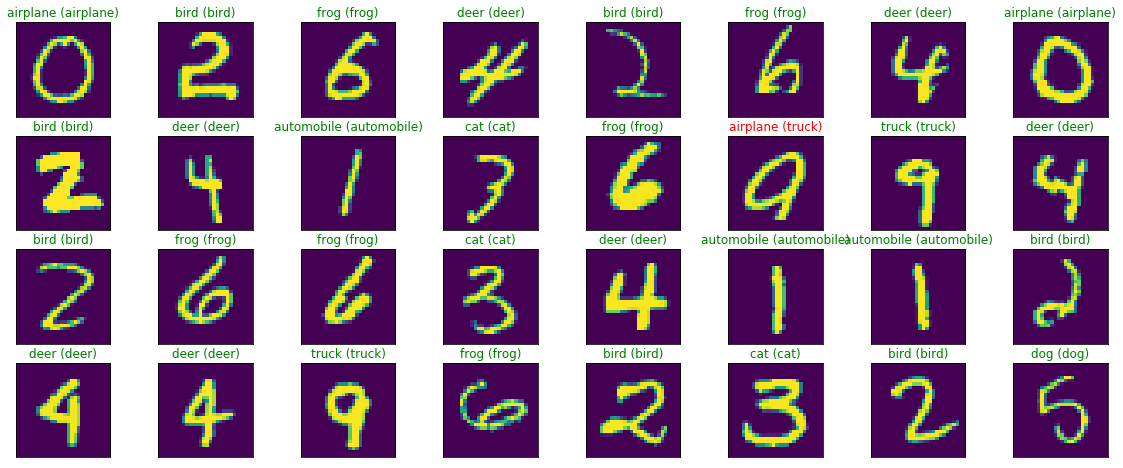

In [24]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx],
                                  cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))